In [5]:
import pandas as pd 

df = pd.read_csv("hotel_bookings.csv")
##df.head()

In [4]:
print("Statistical summary: \n", df.describe())

Statistical summary: 
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                 

In [5]:
print("Column types: \n", df.dtypes)

Column types: 
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent             

In [6]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]

if not null_columns.empty:
    print("Null values:\n", null_columns)
else:
    print("No null values found.")


Null values:
 children         4
country        488
agent        16340
company     112593
dtype: int64


In [6]:
null_percentage = df.isnull().mean() * 100
print("Percentage of null values:\n", null_percentage[null_percentage > 0])
df = df.drop(columns=['agent', 'company'])
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
print(df.isnull().sum())

## isnull() gives me a list of true/false for every column. True is 1 and false is 0. So the mean gives
## me for every column the trues/total n of the column 

## seeing the percentages I will drop the columns agent and company and drop the rows containing nulls
## from the other columns

Percentage of null values:
 children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
custo

In [7]:
print("Duplicated rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicated rows: 32039


In [9]:
duplicate_percentage = df.duplicated().mean() * 100
print("Percentage of duplicated rows:\n", duplicate_percentage[duplicate_percentage > 0])

## Almost a 27% of duplicates might seem a lot but in this case, they could be do to booking behaviour 
## likely frequent booking patterns

Percentage of duplicated rows:
 [26.79788927]


In [10]:

df["is_canceled"].value_counts(normalize=True)


is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

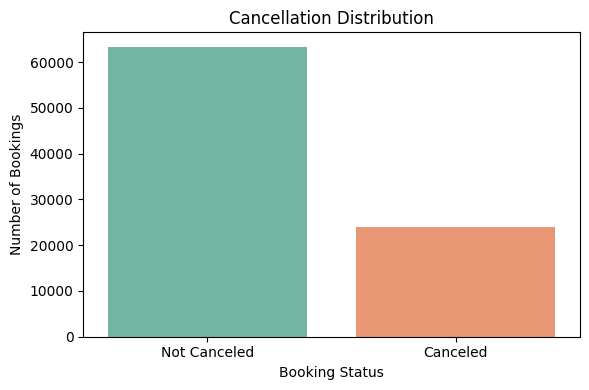

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


df['is_canceled_label'] = df['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

plt.figure(figsize=(6, 4))
sns.countplot(x="is_canceled_label", data=df, hue="is_canceled_label", palette="Set2", legend=False)
plt.title("Cancellation Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")


plt.tight_layout()
plt.show()


In [7]:
# Cancellation rate by deposit type
pivot = df.pivot_table(values="is_canceled", index="deposit_type", aggfunc="mean")
print(pivot)


              is_canceled
deposit_type             
No Deposit       0.266849
Non Refund       0.947013
Refundable       0.242991


In [ ]:
threshold = pivot2[pivot2["is_canceled"] == 1].index.min()
print(f"All bookings are canceled from lead_time = {threshold} days onward.")

## change to the new pivot

All bookings are canceled from lead_time = 357 days onward.
                 is_canceled
lead_time_month             
0                   0.182459
1                   0.363404
2                   0.397375
3                   0.440382
4                   0.435967
5                   0.462025
6                   0.447258
7                   0.469215
8                   0.551453
9                   0.638236
10                  0.693484
11                  0.705587
12                  0.578732
13                  0.625000
14                  0.727444
15                  0.648410
16                  0.829268
17                  0.811475
18                  0.747253
19                  1.000000
20                  1.000000
23                  0.000000
24                  0.000000


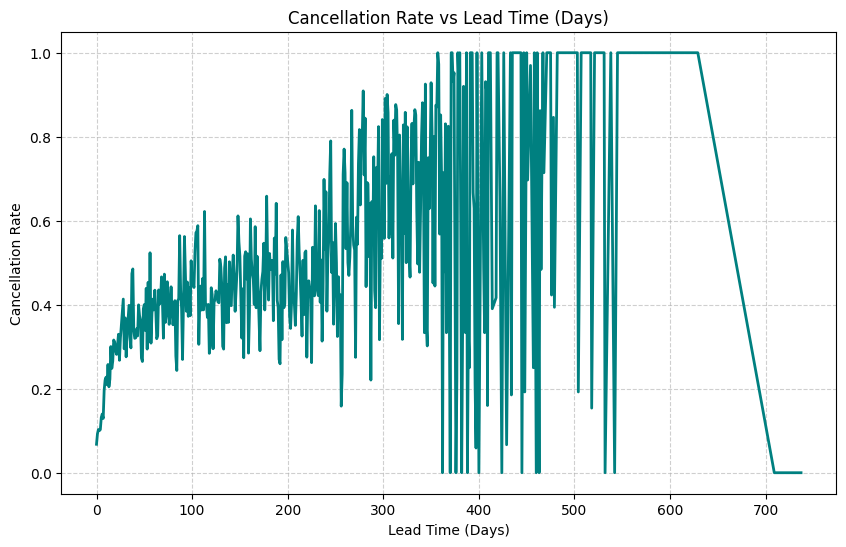

In [ ]:
pivot_lead = df.pivot_table(
    values="is_canceled",
    index="lead_time",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
plt.plot(pivot_lead.index, pivot_lead["is_canceled"], color='teal', linewidth=2)
plt.title("Cancellation Rate vs Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## fter 357 maybe we don't have enough data points so the graph becomes more extreme and less relible
## FInish graphics, comment them calculate correlations
## Find, train and deploy the model

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(pivot_lead.index, pivot_lead["is_canceled"], color='teal', linewidth=2)
plt.title("Cancellation Rate vs Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 357)

plt.show()

## So when making the x-axis go to 357 we see ,ore clearly the trend going upwards


NameError: name 'pivot' is not defined

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_5460/1710192189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="deposit_type", y="is_canceled", data=pivot, palette="Set2")


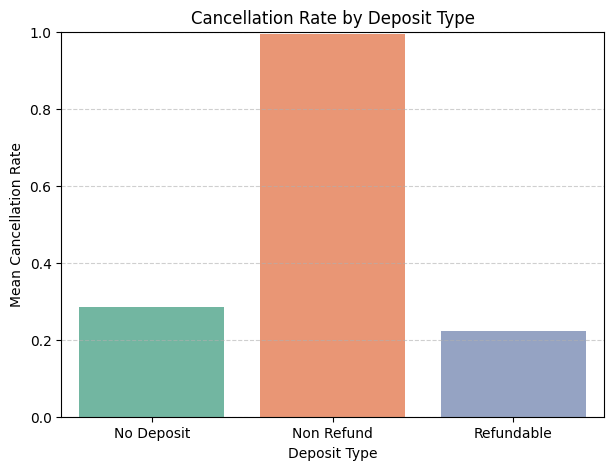

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x="deposit_type", y="is_canceled", data=pivot, palette="Set2")

plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Mean Cancellation Rate")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [3]:
df['deposit_type'].value_counts(normalize=True) * 100


deposit_type
No Deposit    87.646369
Non Refund    12.217941
Refundable     0.135690
Name: proportion, dtype: float64

                    is_canceled
arrival_date_month             
August                 0.321844
July                   0.317987
April                  0.304628
June                   0.303155
May                    0.292280
December               0.268564
September              0.245441
March                  0.243578
October                0.236804
February               0.232043
January                0.221180
November               0.211011


/tmp/ipykernel_3714/136166138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_month.index, y=pivot_month["is_canceled"], palette="viridis")


NameError: name 'ax1' is not defined

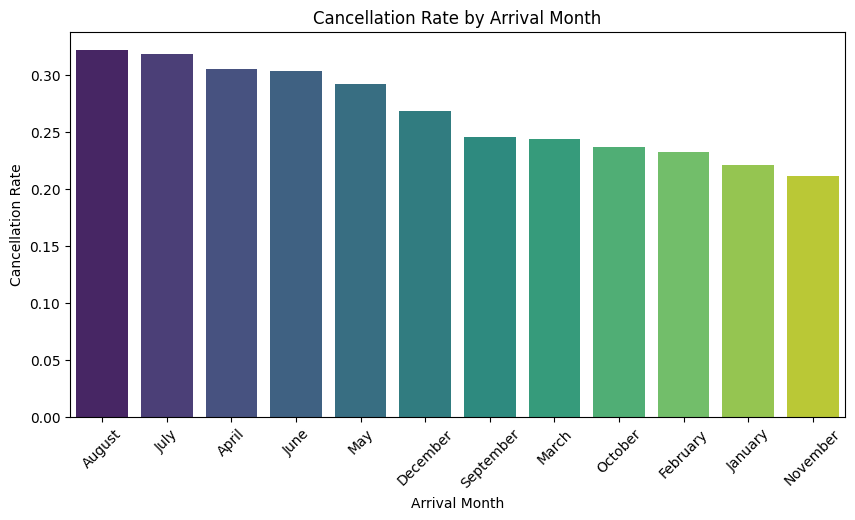

In [ ]:

pivot_month = df.pivot_table(values="is_canceled", index="arrival_date_month", aggfunc="mean").sort_values("is_canceled", ascending=False)
print(pivot_month)
plt.figure(figsize=(10,5))
sns.barplot(x=pivot_month.index, y=pivot_month["is_canceled"], palette="viridis")
plt.title("Cancellation Rate by Arrival Month")
plt.ylabel("Cancellation Rate")
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_3714/2325561367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_segment.index, y=pivot_segment["is_canceled"], palette="coolwarm")


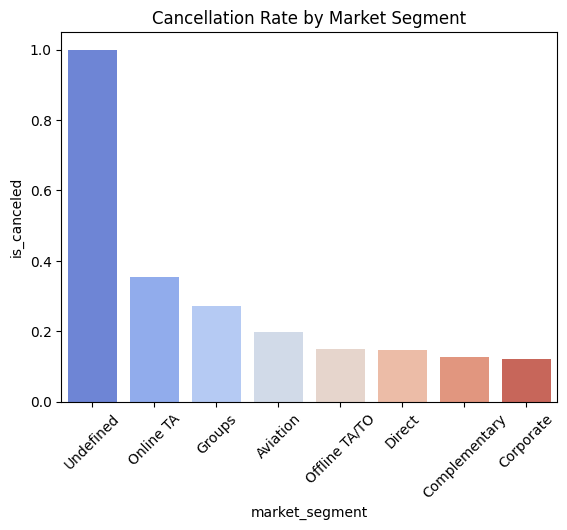

In [13]:
pivot_segment = df.pivot_table(values="is_canceled", index="market_segment", aggfunc="mean").sort_values("is_canceled", ascending=False)
sns.barplot(x=pivot_segment.index, y=pivot_segment["is_canceled"], palette="coolwarm")
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45)
plt.show()


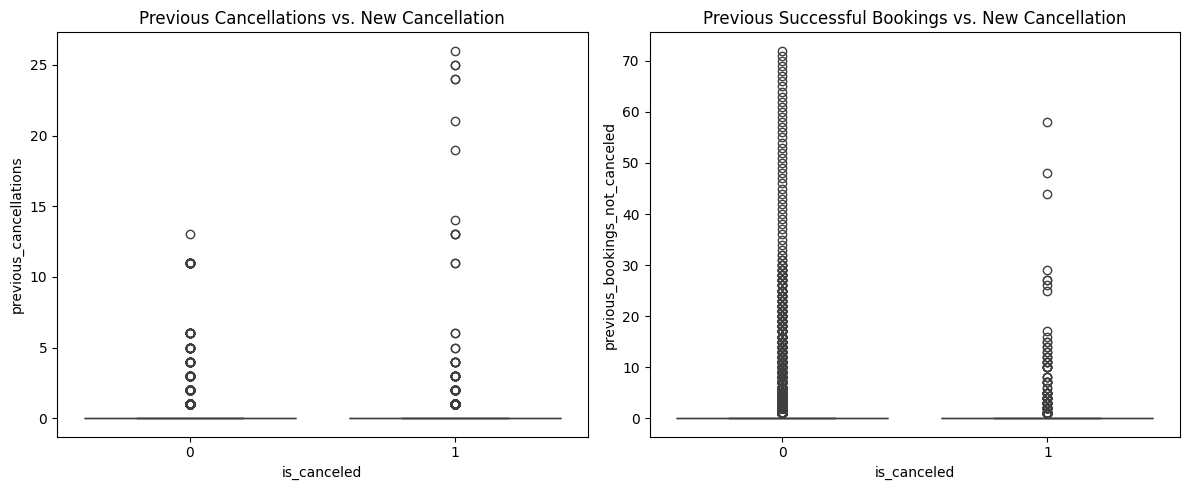

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x="is_canceled", y="previous_cancellations", data=df, ax=axes[0])
axes[0].set_title("Previous Cancellations vs. New Cancellation")

sns.boxplot(x="is_canceled", y="previous_bookings_not_canceled", data=df, ax=axes[1])
axes[1].set_title("Previous Successful Bookings vs. New Cancellation")

plt.tight_layout()
plt.show()


/tmp/ipykernel_3714/616540914.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3714/616540914.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(month_order, rotation=45)


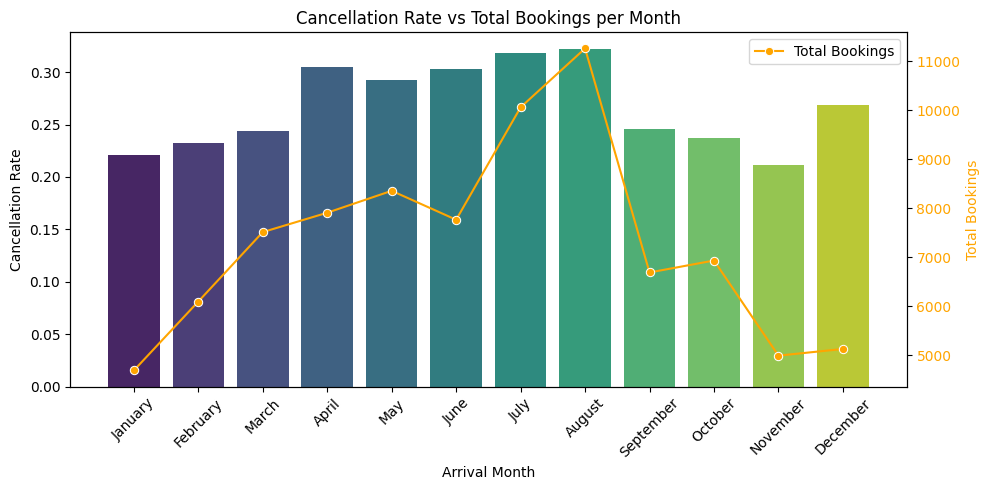

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot tables
pivot_month_rate = df.pivot_table(values="is_canceled", index="arrival_date_month", aggfunc="mean")
pivot_month_count = df.pivot_table(values="is_canceled", index="arrival_date_month", aggfunc="count")

# Optional: reorder months chronologically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
pivot_month_rate = pivot_month_rate.reindex(month_order)
pivot_month_count = pivot_month_count.reindex(month_order)

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Bar plot for cancellation rate
sns.barplot(
    x=pivot_month_rate.index,
    y=pivot_month_rate["is_canceled"],
    palette="viridis",
    ax=ax1
)
ax1.set_ylabel("Cancellation Rate")
ax1.set_xlabel("Arrival Month")
ax1.set_xticklabels(month_order, rotation=45)

# Secondary axis for total bookings
ax2 = ax1.twinx()
sns.lineplot(
    x=pivot_month_count.index,
    y=pivot_month_count["is_canceled"],
    marker="o",
    color="orange",
    label="Total Bookings",
    ax=ax2
)
ax2.set_ylabel("Total Bookings", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

plt.title("Cancellation Rate vs Total Bookings per Month")
fig.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns=['reservation_status', 'reservation_status_date'])
df.to_csv("cleaned_hotel_data.csv", index=False)

['is_canceled', 'lead_time', 'arrival_date_month', 'adults', 'children', 'babies', 'market_segment', 'previous_cancellations', 'previous_bookings_not_canceled', 'deposit_type']
